In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [6]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.csv to EastWestAirlines.csv


In [8]:
airlines_data=pd.read_csv('EastWestAirlines.csv')
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [10]:
scaler= StandardScaler()
standardize_data= pd.DataFrame(scaler.fit_transform(airlines_data.iloc[:,1:]))
standardize_data

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [32]:
normalized_data= pd.DataFrame(normalize(airlines_data.iloc[:,1:]))
normalized_data

,0,1,2,3,4,5,6,7,8,9,10
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [12]:
sns.set_style("darkgrid")
sns.set_context("paper")

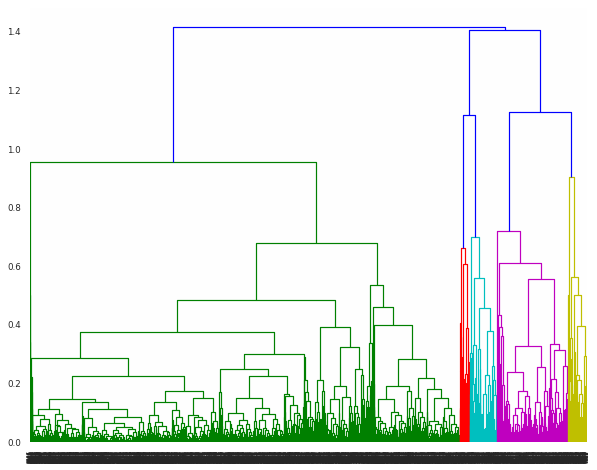

In [13]:
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(normalized_data,method='complete'))

In [28]:
HC= AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
HC


AgglomerativeClustering(n_clusters=5)

In [34]:
heir_df=airlines_data.copy()
heir_df['Cluster_ID']=HC.fit_predict(normalized_data)
heir_df.drop('ID#',axis=1,inplace=True)

In [35]:
heir_df.groupby('Cluster_ID').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster_ID,,,,,,,,,,,
0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


In [36]:
heir_df.Cluster_ID.value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: Cluster_ID, dtype: int64

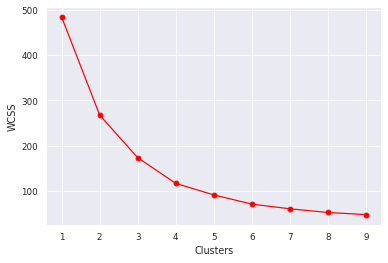

In [38]:
wcss= []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=4)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss,"o-r")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show();

In [40]:
kmeans = KMeans(n_clusters=5,random_state=44)
kmeans.fit(normalized_data)

KMeans(n_clusters=5, random_state=44)

In [41]:
km_df=airlines_data.copy()
km_df.drop('ID#',axis=1,inplace=True)

In [42]:
km_df['Cluster_ID']= kmeans.labels_
km_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [43]:
km_df.Cluster_ID.value_counts()


0    2142
3    1006
4     388
1     352
2     111
Name: Cluster_ID, dtype: int64

In [44]:
km_df.groupby('Cluster_ID').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster_ID,,,,,,,,,,,
0,97404.121382,185.499533,1.604575,1.009337,1.001867,9636.360411,9.704015,520.399627,1.565359,3960.816060,0.269374
1,27526.798295,115.818182,3.247159,1.034091,1.071023,41812.809659,17.599432,676.107955,1.951705,4226.252841,0.903409
2,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225
3,70743.739563,116.122266,3.135189,1.025845,1.019881,32531.393638,17.626243,442.855865,1.312127,4045.261431,0.491054
4,11768.858247,55.121134,1.005155,1.000000,1.000000,984.778351,3.469072,93.216495,0.293814,4908.760309,0.172680


In [45]:
from sklearn.cluster import DBSCAN

In [47]:
dbscan = DBSCAN(eps=0.08,min_samples=5)
dbscan.fit(normalized_data)

DBSCAN(eps=0.08)

In [48]:
clusters=pd.DataFrame(dbscan.labels_,columns=['Cluster_ID'])
clusters.value_counts()

Cluster_ID
 0            3893
-1              90
 1               9
 3               5
 2               2
dtype: int64

Text(0, 0.5, 'Balance')

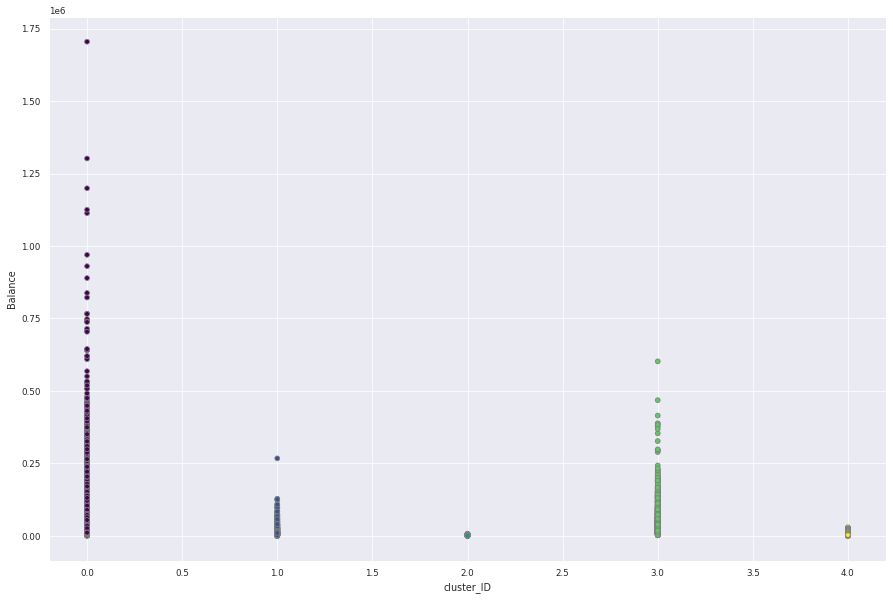

In [49]:
colors=plt.get_cmap('viridis')
plt.figure(figsize=(15, 10))  
plt.scatter(km_df['Cluster_ID'],km_df['Balance'], c=kmeans.labels_,cmap=colors,edgecolors='grey') 
plt.xlabel("cluster_ID")
plt.ylabel("Balance")